In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

c0 = np.full(5000, 0)
c1 = np.full(600, 1)
c2 = np.full(650, 2)
c3 = np.full(300, 3)
c4 = np.full(500, 4)
c5 = np.full(800, 5)

y = np.concatenate((c0, c1, c2, c3, c4, c5), axis=None)
np.random.shuffle(y)

x = np.random.rand(len(y))

#print(len(data))

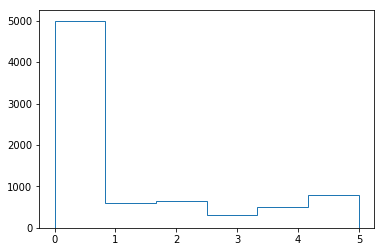

In [3]:
plt.hist(y, bins=6, range=[0, 5], histtype='step')
plt.show()

In [4]:
def balance_measure(d):
    N = len(d)
    classes, counts = np.unique(d, return_counts=True)
    n_classes = len(classes)

    H = -sum([ (counts[i]/N) * np.log((counts[i]/N)) for i in range(len(classes))]) #shannon entropy
    return H/np.log(n_classes)

In [5]:
print(balance_measure(y))

0.6825747141942664


In [6]:
classes, counts = np.unique(y, return_counts=True)
max_class = np.argmax(counts)

In [7]:
sorted_y = np.sort(y)
sorted_x = [j for _,j in sorted(zip(y, x))]

splitted_x = np.split(sorted_x, np.argwhere(np.diff(sorted_y) != 0)[:,0] + 1)
splitted_y = np.split(sorted_y, np.argwhere(np.diff(sorted_y) != 0)[:,0] + 1)

In [8]:
bins = np.arange(0.1, 1, 0.1)
balance = []
acc = []
for i in reversed(bins):
    #print(type(round(i,1)) )
    D = []
    C = []
    
    for j in range(len(splitted_x)):
        #print(j)
        if j == max_class:
            #print(len(splitted_x[j]))
            D.append(splitted_x[j])
            C.append(splitted_y[j])
        else:
            length = len(splitted_x[j])
            sel = int(length*i)
            #print(length, sel)
            D.append(splitted_x[j][:sel])
            C.append(splitted_y[j][:sel])
    
    selected_x = np.asarray(D)
    selected_y = np.asarray(C)
    
    extended_x = np.concatenate(selected_x, axis=0)
    extended_y = np.concatenate(selected_y, axis=0)
    
    balance.append(balance_measure(extended_y))

print(balance)
    
    

[0.6533980346323592, 0.6203275454115936, 0.5826028194632606, 0.5392414919076292, 0.48893972402315766, 0.42990149032083613, 0.35951290446766243, 0.2736082143642816, 0.16423104135987043]


In [11]:
def balance_measure_dict(d):
    classes = list(d.keys())
    counts = list(d.values())
    
    n_classes = len(classes)
    N = sum(counts)
    
    H = -sum([ (counts[i]/N) * np.log((counts[i]/N)) for i in range(len(classes))])
    return H/np.log(n_classes)

In [12]:
d={0:5000, 1:600, 2:300, 3:500}

print(balance_measure_dict(d))

0.5463506838307542
